In [228]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 8)})

dataset = sklearn.datasets.load_boston()

In [229]:
def regression_score(y, predict):
    print("RMSE:", metrics.mean_squared_error(y, predict, squared=False))
    print("MSE:", metrics.mean_squared_error(y, predict, squared=True))
    print("R2:", metrics.r2_score(y, predict))
    print("MAPE:", metrics.mean_absolute_error(y, predict))

In [230]:
def gridsearchscore(regression):
    print(f'Best score: {regression.best_score_}, Best parameters: {regression.best_params_}')

In [231]:
def truepredplot(y_true, predicted):
    ax = sns.regplot(y=y_true, x=predicted)
    ax.set(xlabel='predicted values', ylabel='true values')
    plt.show()

In [232]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['MEDV'] = pd.Series(dataset.target)

<AxesSubplot:>

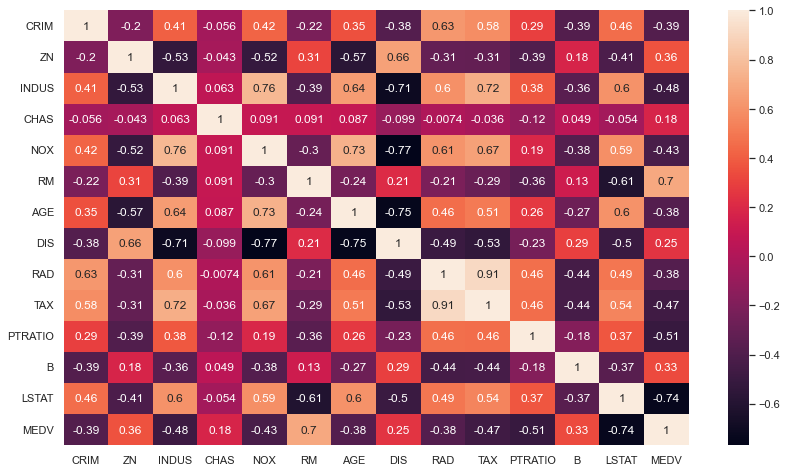

In [233]:
corr = df.corr()
sns.heatmap(data=corr, annot=True)

In [234]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM'], df['TAX']], columns=['LSTAT', 'RM', 'TAX'])
y = df['MEDV']

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

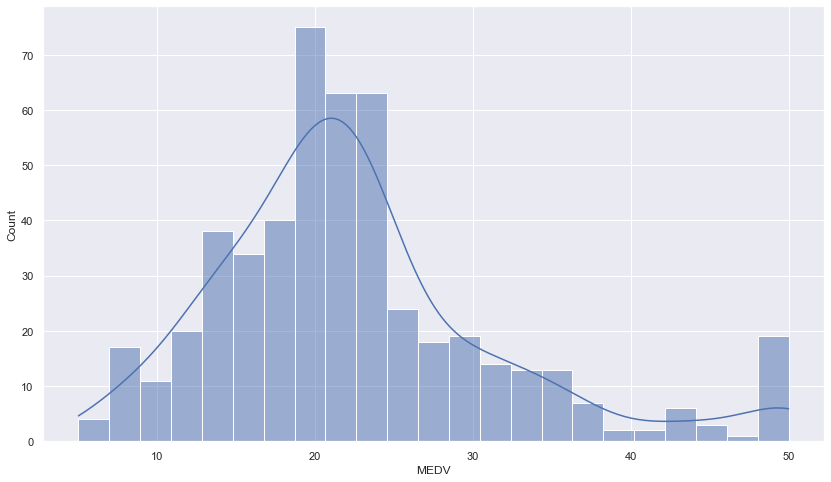

In [235]:
sns.histplot(data=y, kde=True)

<AxesSubplot:>

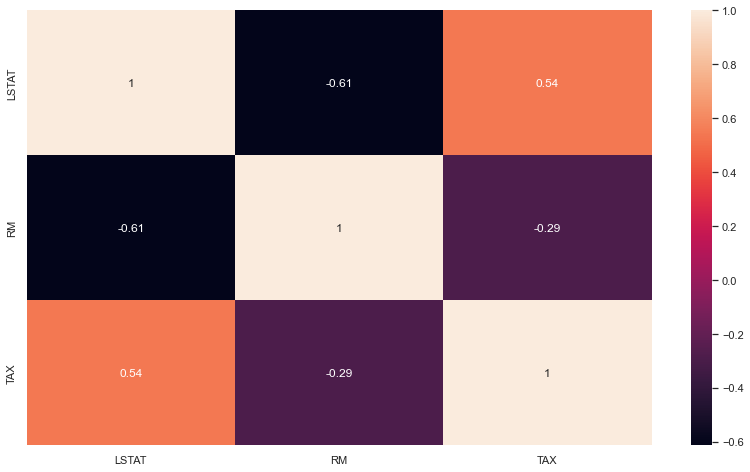

In [236]:
corr = X.corr()
sns.heatmap(data=corr, annot=True)

In [237]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=17)

Спочатку спробуємо одношарову:

In [238]:
perc_reg = MLPRegressor(max_iter=10000)

In [239]:
perc_reg.fit(X_train, y_train)

MLPRegressor(max_iter=10000)

In [240]:
predict_perc = perc_reg.predict(X_test)

regression_score(y_test, predict_perc)

RMSE: 5.306519636071899
MSE: 28.159150648016638
R2: 0.5730392121588753
MAPE: 3.589408081529165


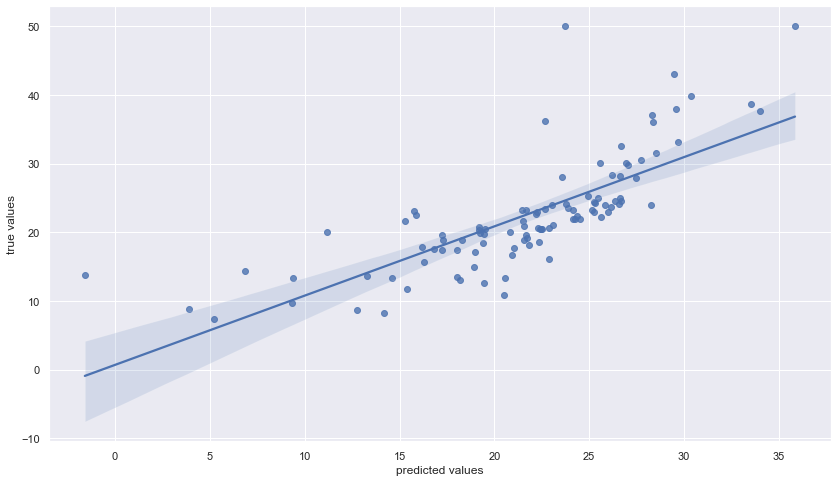

In [241]:
truepredplot(y_test, predict_perc)

In [242]:
predict_perc = perc_reg.predict(X_train)

regression_score(y_train, predict_perc)

RMSE: 5.796315726597377
MSE: 33.59727600240007
R2: 0.6228488113655682
MAPE: 3.9880175429480884


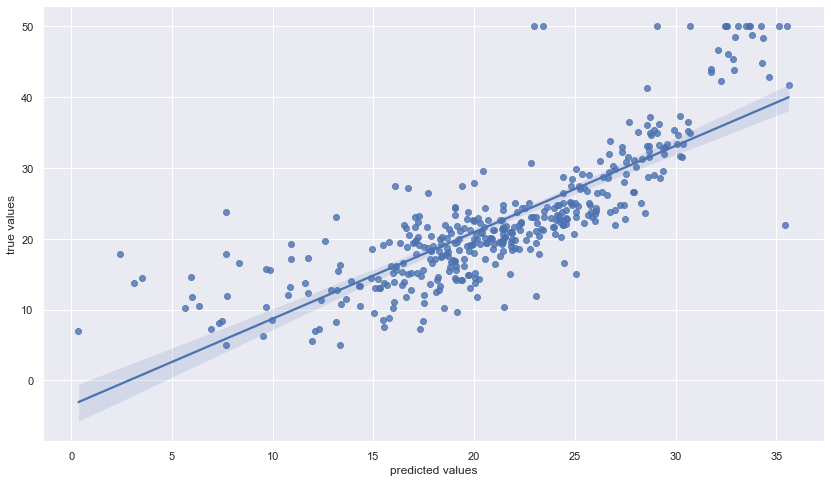

In [243]:
truepredplot(y_train, predict_perc)

Значення метрик достатнє, але є місце для покращення, спробуємо налаштувати гіперпараметри


In [244]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5]}

perc_reg_gs = GridSearchCV(perc_reg, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [245]:
perc_reg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5]},
             scoring='neg_mean_squared_error')

In [246]:
gridsearchscore(perc_reg_gs)

Best score: -22.348455836747153, Best parameters: {'alpha': 0.1}


In [247]:
predict_perc_gs = perc_reg_gs.predict(X_test)

regression_score(y_test, predict_perc_gs)

RMSE: 5.967997090857421
MSE: 35.61698927648264
R2: 0.45996035206811137
MAPE: 3.913086441043243


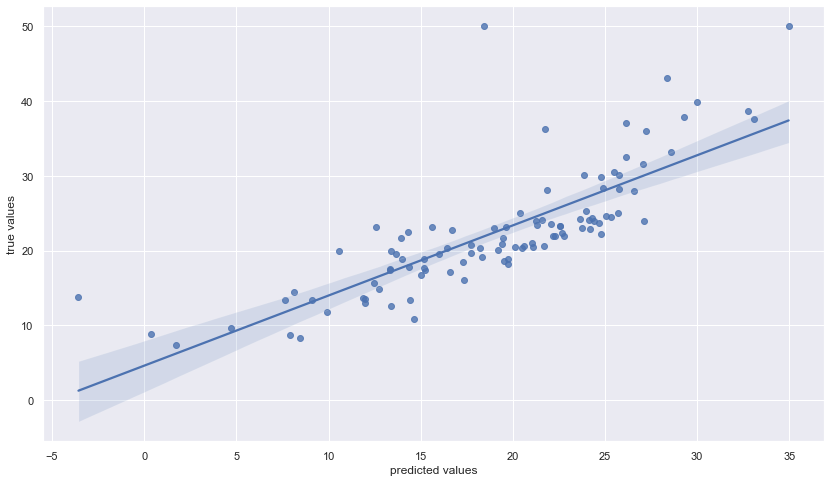

In [248]:
truepredplot(y_test, predict_perc_gs)

In [249]:
predict_perc_gs = perc_reg_gs.predict(X_train)

regression_score(y_train, predict_perc_gs)

RMSE: 6.601088562278774
MSE: 43.57437020704765
R2: 0.5108494654027668
MAPE: 4.642063531608666


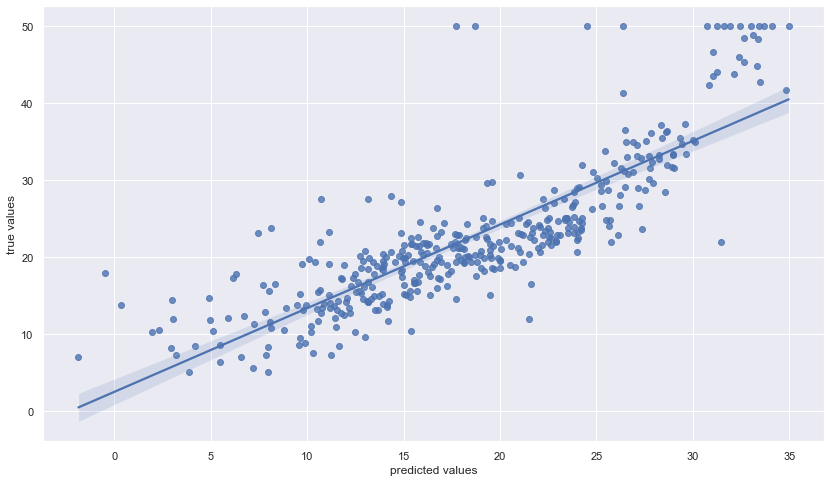

In [250]:
truepredplot(y_train, predict_perc_gs)

Решітчастий пошук видав результат для альфа за замовчуванням (0.0001)

Решітчастим пошуком сробуємо підібрати кількість нейронів

In [251]:
parameters = {'hidden_layer_sizes': [(50, ), (100, ), (150, )]}

perc_reg_gs = GridSearchCV(perc_reg, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [252]:
perc_reg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(50,), (100,), (150,)]},
             scoring='neg_mean_squared_error')

In [253]:
gridsearchscore(perc_reg_gs)

Best score: -63.275075720295035, Best parameters: {'hidden_layer_sizes': (150,)}


In [254]:
predict_perc_gs = perc_reg_gs.predict(X_test)

regression_score(y_test, predict_perc_gs)

RMSE: 5.0017287120008005
MSE: 25.01729010845319
R2: 0.6206774121893665
MAPE: 3.571650718544004


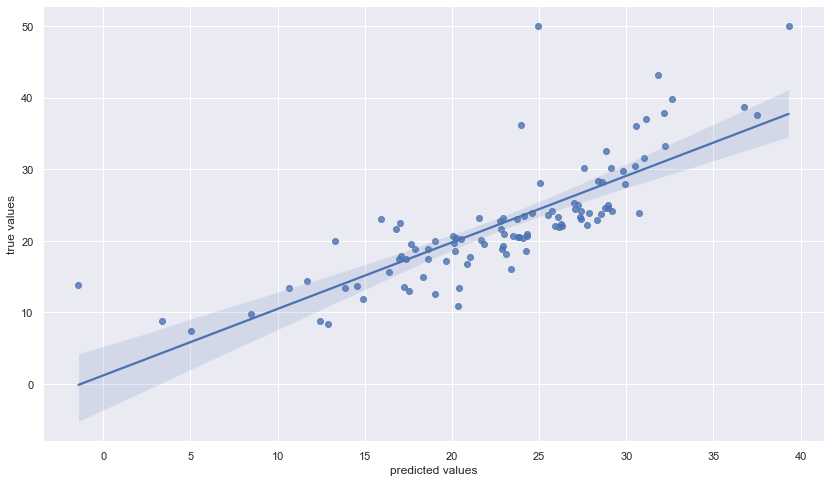

In [255]:
truepredplot(y_test, predict_perc_gs)

In [256]:
predict_perc_gs = perc_reg_gs.predict(X_train)

regression_score(y_train, predict_perc_gs)

RMSE: 5.159906400597351
MSE: 26.624634062925516
R2: 0.7011212342610214
MAPE: 3.7285258621888575


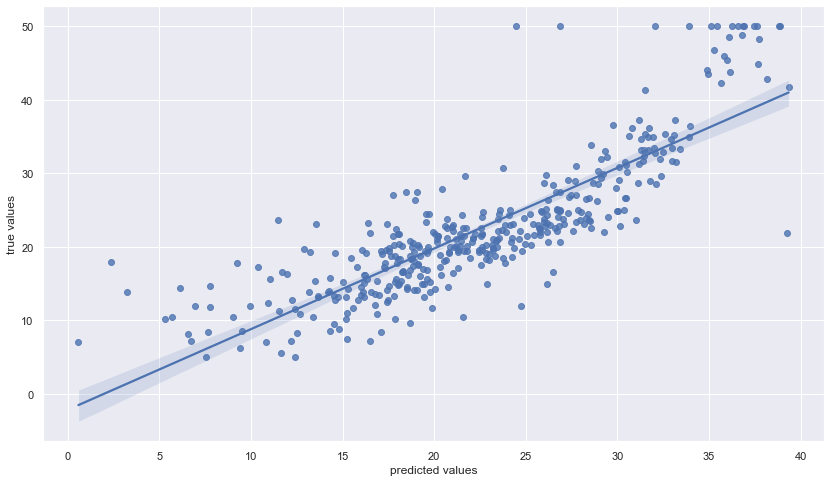

In [257]:
truepredplot(y_train, predict_perc_gs)

Тепер alpha та одношарову hidden_layer_size разом

In [258]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5], \
              'hidden_layer_sizes': [(10, ), (50, ), (100, ), (150, )]}

perc_reg_gs = GridSearchCV(perc_reg, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [259]:
perc_reg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5],
                         'hidden_layer_sizes': [(10,), (50,), (100,), (150,)]},
             scoring='neg_mean_squared_error')

In [260]:
gridsearchscore(perc_reg_gs)

Best score: -20.027174351101188, Best parameters: {'alpha': 5, 'hidden_layer_sizes': (100,)}


In [261]:
predict_perc_gs = perc_reg_gs.predict(X_test)

regression_score(y_test, predict_perc_gs)

RMSE: 4.7482681118653725
MSE: 22.546050062157548
R2: 0.6581473845724022
MAPE: 3.2217149521649833


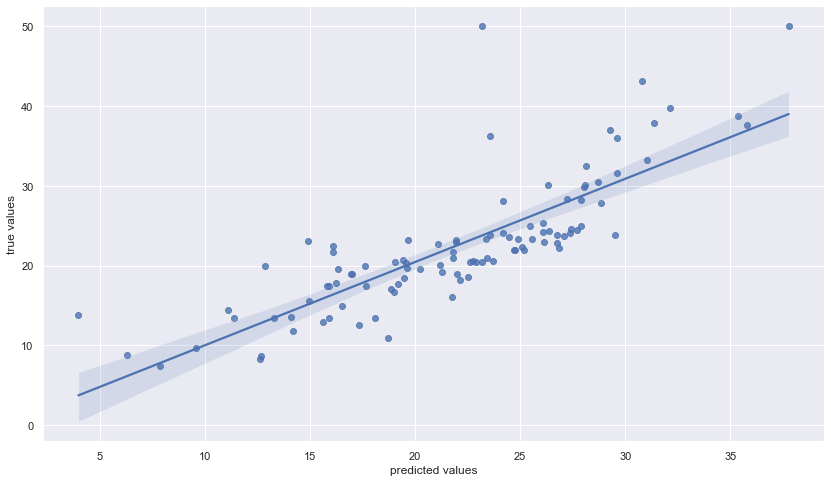

In [262]:
truepredplot(y_test, predict_perc_gs)

In [263]:
predict_perc_gs = perc_reg_gs.predict(X_train)

regression_score(y_train, predict_perc_gs)

RMSE: 5.181480125517626
MSE: 26.847736291134154
R2: 0.6986167672158399
MAPE: 3.5669944378625122


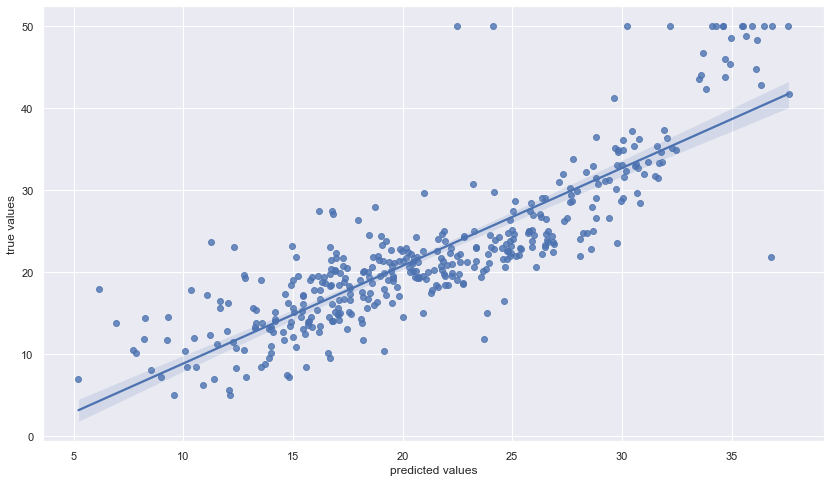

In [264]:
truepredplot(y_train, predict_perc_gs)

Нажаль нейронна мережа не зрівнялася зі значенням Elastic Net, тому спробуємо двошарову:

In [265]:
parameters = {'alpha': [0.01, 0.1, 1, 2, 5], \
              'hidden_layer_sizes': [(100, 50), (50, 100), (100, 100), (50, 50)]}

perc_reg_gs = GridSearchCV(perc_reg, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [266]:
perc_reg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 2, 5],
                         'hidden_layer_sizes': [(100, 50), (50, 100),
                                                (100, 100), (50, 50)]},
             scoring='neg_mean_squared_error')

In [267]:
gridsearchscore(perc_reg_gs)

Best score: -19.977848688629376, Best parameters: {'alpha': 5, 'hidden_layer_sizes': (100, 50)}


In [268]:
predict_perc_gs = perc_reg_gs.predict(X_test)

regression_score(y_test, predict_perc_gs)

RMSE: 4.854493260068672
MSE: 23.566104812052163
R2: 0.642680888970314
MAPE: 3.3627047026558343


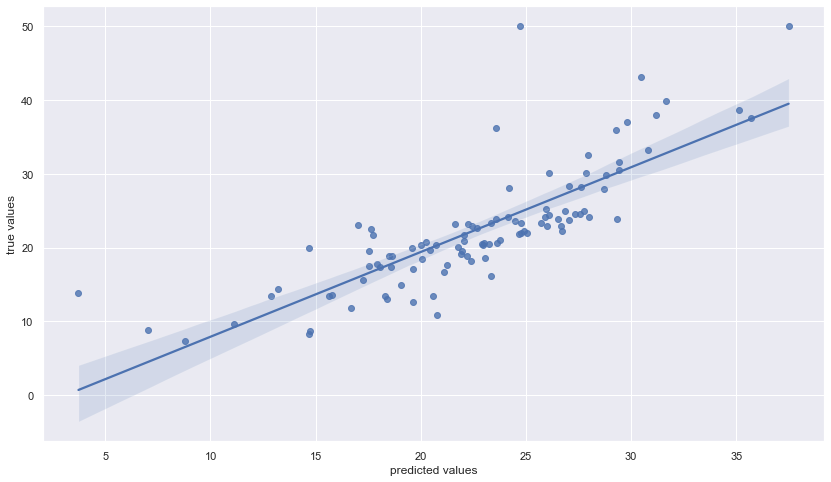

In [269]:
truepredplot(y_test, predict_perc_gs)

In [270]:
predict_perc_gs = perc_reg_gs.predict(X_train)

regression_score(y_train, predict_perc_gs)

RMSE: 5.276358949928081
MSE: 27.839963768486168
R2: 0.6874783709823975
MAPE: 3.756490909158744


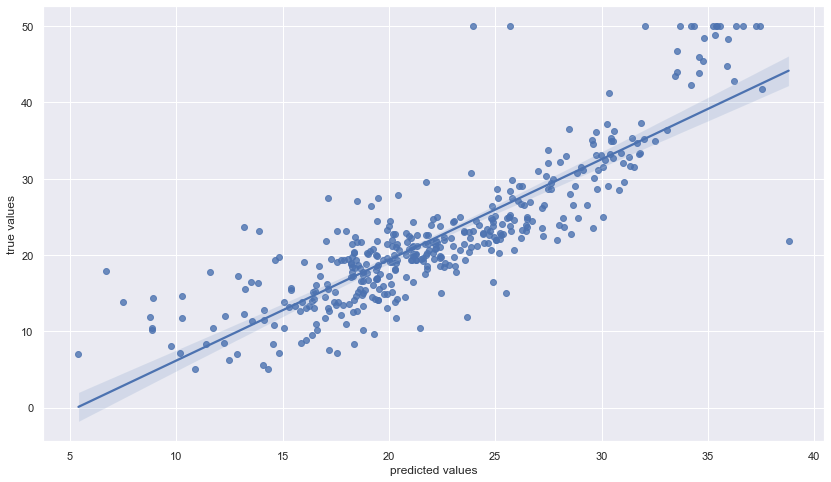

In [271]:
truepredplot(y_train, predict_perc_gs)